<a href="https://colab.research.google.com/github/galmercado/IntroToDataScienceHIT/blob/main/IntroToDataScience_withBonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#installations of packages
!pip install yahoo-fin
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

     |████████████████████████████████| 81 kB 5.6 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 127 kB 65.0 MB/s 
     |████████████████████████████████| 111 kB 59.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=63f67cafe7bd47d3721b292321a4558c30e19b1d3ab9b3dd3d5362e961a0899d
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=5fdfd8c79f9a2d66851a8588abf2726bea3e01282d589755d3c5b8432399dc00
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=9c7e6b8061c7266762aef4caac604d4536bab8a2e65b2c644cde2f9f66113274
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [6]:
START_DATE = "2020-04-15"
END_DATE = "2021-12-15"

# Data Collection

In [10]:
is_api = True
if (is_api):
  df_c_global = collect_api("https://disease.sh/v3/covid-19/historical/all?lastdays=all")
  df_c_byCountry = collect_api("https://disease.sh/v3/covid-19/historical/?lastdays=all")
  df_c_vac = collect_api("https://disease.sh/v3/covid-19/vaccine/coverage/countries")
  #df_s_pfz = get_stock("PFE")
  #df_s_sp500 = get_stock("^GSPC")
  #df_s_tsmc = get_stock("TSM")




In [12]:
df_population_ByCountry = getCountriesPopulation()

In [9]:
#Get all S&P 500 (USA) stocks
from yahoo_fin import stock_info
df_s_sp500stocks = []
count = 0
for stock in stock_info.tickers_sp500():
  df_s_sp500stocks.append(get_stock(stock, is_api = True))
  count += 1
  if(count % 100 == 0):
    print("Passed ", count)

#print(df_s_sp500stocks[0])

/usr/local/lib/python3.7/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


Passed  100
Passed  200
Passed  300
Passed  400
Passed  500


In [4]:
#Get all FTSE250 (UK) stocks
from yahoo_fin import stock_info
df_s_ftse250stocks = []
count = 0
for stock in pd.Series(stock_info.tickers_ftse250()).apply(lambda x: x + ".L").tolist():
  df_s_ftse250stocks.append(get_stock(stock))
  count += 1
  if(count % 100 == 0):
    print("Passed ", count)
print(df_s_ftse250stocks[0])

NameError: ignored

In [ ]:
lst_df_s_ta125stocks = []
for stock in getTA125():
  print(stock)
  try:
    lst_df_s_ta125stocks.append(get_stock(stock))
  except:
    try:
      lst_df_s_ta125stocks.append(get_stock(stock, is_api = True))
    except:
      continue

In [ ]:
print(lst_df_s_ta125stocks)

In [8]:
#Major stocks indices by country
dic_s_Indices_ByCountry = {"USA": ["^GSPC", "^DJI", "^IXIC", "^NYA", "^VIX", "^STI"],
                           "UK": ["^BUK100P", "^RUT", "^FTSE"], "Germany": ["^GDAXI"],
                           "France": ["^FCHI"], "Belgium": ["^BFX"], "Russia": ["IMOEX.ME"],
                           "Japan": ["^N225"], "China": ["^HSI", "000001.SS"], "Mexico" : ["^MXX"],
                           "Argentina" : ["^MERV"], "Israel" : ["^TA125.TA"]}

dic_df_s_indices_byCountry = {}
for country in dic_s_Indices_ByCountry.keys():
  lst_df_indices = []
  for indice in dic_s_Indices_ByCountry[country]:
    lst_df_indices.append(get_stock(indice, is_api = True))
  dic_df_s_indices_byCountry[country] = lst_df_indices

In [13]:
print(dic_df_s_indices_byCountry["USA"][0])

               adjclose ticker
2020-04-15  2783.360107  ^GSPC
2020-04-16  2799.550049  ^GSPC
2020-04-17  2874.560059  ^GSPC
2020-04-20  2823.159912  ^GSPC
2020-04-21  2736.560059  ^GSPC
...                 ...    ...
2021-12-08  4701.209961  ^GSPC
2021-12-09  4667.450195  ^GSPC
2021-12-10  4712.020020  ^GSPC
2021-12-13  4668.970215  ^GSPC
2021-12-14  4634.089844  ^GSPC

[422 rows x 2 columns]


In [15]:
#List of countries that we'll look into
lst_countries = list(dic_s_Indices_ByCountry.keys())
lst_countries.remove("UK")


In [112]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
# Get all Tel Aviv 125 Stocks
def getTA125():
  url="https://en.wikipedia.org/wiki/TA-125_Index"
  table_class="wikitable sortable jquery-tablesorter"
  response=requests.get(url)
  bs = BeautifulSoup(response.text, 'lxml')
  ta125_table=bs.find_all('table',{'class':"wikitable"})[1]
  df = pd.read_html(str(ta125_table))
  #for some reason df is a list, and we want to return only the symbols (with the TA suffix) as a list
  return (df[0].loc[:, "Symbol"].apply(lambda x: x + ".TA").tolist())

In [11]:

import requests
import pandas as pd 
from bs4 import BeautifulSoup
def getCountriesPopulation():
  url="https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
  table_class="wikitable sortable jquery-tablesorter"
  response=requests.get(url)
  bs = BeautifulSoup(response.text, 'lxml')
  pop_table=bs.find_all('table',{'class':"wikitable"})
  df = pd.read_html(str(pop_table))
  #for some reason df is a list, and we want to return only the population and country
  df[0].loc[df[0]["Country / Dependency"] == "United States"] == "USA"
  return (df[0].filter(["Country / Dependency", "Population"]))

  #return (df[0].loc[:, "Symbol"].apply(lambda x: x + ".TA").tolist())
getCountriesPopulation()

,Country / Dependency,Population
0,NaN,7926857000
1,China,1412600000
2,India,1387470279
3,United States,333146565
4,Indonesia[b],271350000
...,...,...
237,Niue (New Zealand),1549
238,Tokelau (New Zealand),1501
239,Vatican City,825
240,Cocos (Keeling) Islands (Australia),573


In [7]:
import requests 
import pandas as pd
from yahoo_fin.stock_info import get_data as get_stock_data
def collect_api(url, is_stock = False):
  # Make a get request.
  response = requests.get(url)
  response_d = response.content.decode("utf-8")
  if (is_stock):
    #The json comes as dictionary from marketshare api, pandas doesn't need read_json in such a case :O
    df = pd.DataFrame(response.json()["data"])
  
  else:
    df = pd.read_json(response_d)
  return df

#Gets stock dataframe in date timeline, uses either yahoo-fi api or my very own crawler
def get_stock(symbol, start_date = START_DATE, end_date = END_DATE,
              date_format = '%Y-%m-%d', is_api = False):
    #Returns df with close prices from the first day of covid data to Jan 27th 2022
  if is_api:
    df = get_stock_data(symbol, start_date, end_date).filter(["adjclose", "ticker"])
  else:
      df = collect_crawling(symbol, start_date, end_date, date_format).filter(["adjclose", "ticker"])
  
  return df


In [9]:
import sys
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
import bs4
import time
from bs4 import BeautifulSoup 
from selenium import webdriver
import pandas as pd
import requests 
from datetime import datetime
from io import StringIO
def collect_crawling(stock_name, str_start_date, str_end_date, date_format):
  start_date = datetime.strptime(str_start_date, date_format)
  end_date = datetime.strptime(str_end_date, date_format)
  s = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  url = "https://finance.yahoo.com/quote/"+ stock_name + "/history?period1=" + str(int(start_date.timestamp())) + "&period2=" + str(int(end_date.timestamp())) + "&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
  s.get(url)

  #Scroll down enough times that the whole table will be shown
  SCROLL_PAUSE_TIME = 0.01
  # Get scroll height
  last_height = s.execute_script("return document.documentElement.scrollHeight")
  while True:
      # Scroll down to bottom
      s.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
      # Wait to load page
      time.sleep(SCROLL_PAUSE_TIME)
      # Calculate new scroll height and compare with last scroll height
      new_height = s.execute_script("return document.documentElement.scrollHeight")
      if new_height == last_height:
          break
      last_height = new_height

  bsPage = BeautifulSoup(s.page_source, 'lxml')
  c_Table = bsPage.find('table', class_='W(100%) M(0)')
  try:
    c_Table_Rows = c_Table.find_all('tr', class_='BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)')
  except:
    #Not found
    return pd.DataFrame()
  c_data = []
  for row in c_Table_Rows:
    rowAsDict = {}
    Values = row.find_all('td')
  
  # Values (Open, High, Close etc.) are extracted and stored in dictionary
    if len(Values) == 7:
      rowAsDict["Date"] = Values[0].find('span').text.replace(',', '')
      try:
        rowAsDict["Open"] = Values[1].find('span').text.replace(',', '')
      except: 
        rowAsDict["Open"] = ""
      try:
        rowAsDict["High"] = Values[2].find('span').text.replace(',', '')
      except:
        rowAsDict["High"] = ""
      try:
        rowAsDict["Low"] = Values[3].find('span').text.replace(',', '')
      except:
        rowAsDict["Low"] = ""
      try:
        rowAsDict["Close"] = Values[4].find('span').text.replace(',', '')
      except:
        rowAsDict["Close"] = ""
      try:
        rowAsDict["Adj Close"] = Values[5].find('span').text.replace(',', '')
      except:
        rowAsDict["Adj Close"] = ""
      try:
        rowAsDict["Volume"] = Values[6].find('span').text.replace(',', '') 
      except:
         rowAsDict["Volume"] = ""
      # Dictionary is appended in list
      c_data.append(rowAsDict)
  df = pd.DataFrame(c_data)
  df = df.set_index("Date")
  df = df.rename(index = lambda s: datetime.strptime(s, "%b %d %Y"))
  df = df.rename(columns={"Adj Close": "adjclose"})
  df["ticker"] = stock_name
  return(df)


# Data Handaling

We'll not look into the initial phase of the pandemic due to the anomalities regarding the behaviour of investors because of the lack of knowledge regarding covid and it's impact.

In [13]:
df_population_ByCountry["Country / Dependency"][3:4] = "USA"
df_population_ByCountry["Country / Dependency"][9:10] = "Russia"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
from datetime import datetime
#print(df_c_global)
dic_c_df_cases_byCountry = {}
for country in lst_countries:
  #Transform the given df to my format
  df = df_c_byCountry.loc[df_c_byCountry["country"] == country]
  df = pd.DataFrame.from_dict(pd.DataFrame(list(df["timeline"]))["cases"][0], orient = 'index', columns=['cases'])
  #Change format of dates to datetime format
  df = df.rename(index = lambda s: datetime.strptime(s, "%m/%d/%y"))

  #Instead of absolute cases #, we'll have the NEW case # (case # - previous day case #)
  df_diff = df.loc[START_DATE : END_DATE].diff()
  dic_c_df_cases_byCountry[country] = df_diff

#print(dic_c_df_cases_byCountry["USA"])

df_c_global_diff = df_c_global.loc[START_DATE : END_DATE].diff()


In [146]:
df = df_c_byCountry.loc[df_c_byCountry["country"] == "UK"]
df = pd.DataFrame.from_dict(pd.DataFrame(list(df["timeline"]))["cases"][0], orient = 'index', columns=['cases'])
df = df.rename(index = lambda s: datetime.strptime(s, "%m/%d/%y"))
print(df.loc["2020-10-15"])


cases    3
Name: 2020-10-15 00:00:00, dtype: int64


In [17]:
#import pandas_ta
def add_perc_and_isUp(lst_df):
  copy_lst_df = lst_df
  for df in copy_lst_df:
    if df.empty == False:
      try:
        df["adjclose"] = df["adjclose"].apply(lambda x: int(float(x)))
      except:
        print("")
      try:
        df["s_perc_diff"] = df["adjclose"].pct_change() * 100
        df["s_is_up"] = df["s_perc_diff"].apply(lambda x: 1 if x > 0 else 0)
      except:
        print("PROOBBBB" , df)
  return copy_lst_df

copy_lst_df_s_sp500stocks = add_perc_and_isUp(df_s_sp500stocks)
#copy_lst_df_s_ftse250stocks = add_perc_and_isUp(df_s_ftse250stocks)
#copy_lst_df_s_ta125stocks = add_perc_and_isUp(lst_df_s_ta125stocks)
#for country in lst_countries:
#  dic_df_s_indices_byCountry[country] = add_perc_and_isUp(dic_df_s_indices_byCountry[country])
      

In [ ]:
df_s_pfx = get_stock("PFE", is_api = True)
df_s_aapl = get_stock("AAPL", is_api = True)
lst_stock = add_perc_and_isUp([df_s_pfx, df_s_aapl])

import matplotlib.pyplot as plt
import random
from matplotlib.dates import DateFormatter

variable = "Stocks Apple and Pfizer"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()

for ind in lst_stock:
  ax.plot(ind.index.values,ind["adjclose"], c=(random.random(),random.random(), random.random()), label = ind["ticker"][0])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()


variable = "Stocks % diff Apple and Pfizer"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()

for ind in lst_stock:
  ax.plot(ind.index.values,ind["s_perc_diff"], c=(random.random(),random.random(), random.random()), label = ind["ticker"][0])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()

plt.show()

Little playground with the data, to understand what we need to use :)

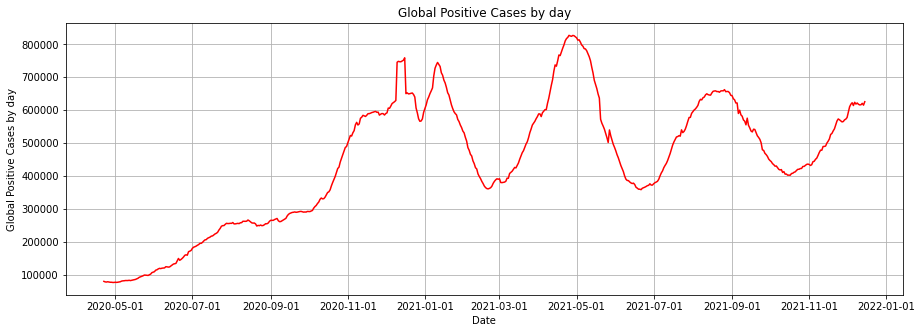

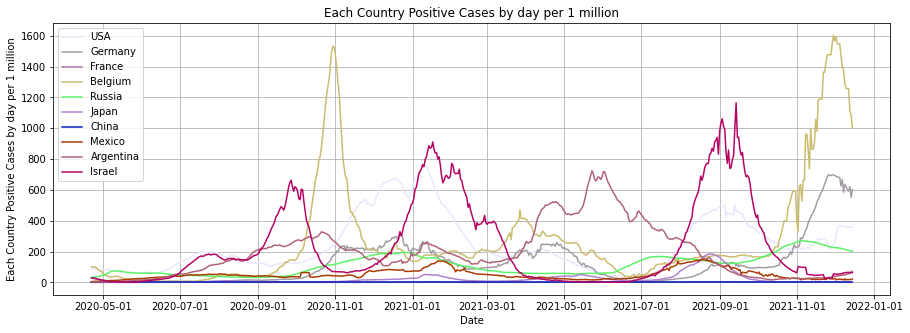

In [18]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import random

def add_perc_isUp_rollingCases(df):
  rolling_average_days = 7
  df_rolling = df
  df_rolling["cases_rolling"] = df['cases'].rolling(window=rolling_average_days).mean()
  df_rolling["c_perc_diff"] = df_rolling["cases_rolling"].pct_change() * 100
  df_rolling["c_is_up"] = df_rolling["c_perc_diff"].apply(lambda x: 1 if x > 0 else 0)
  df_rolling["cases_rolling_per1m"] = df_rolling["cases_rolling"].apply(lambda x: x / (df_population_ByCountry.loc[df_population_ByCountry["Country / Dependency"] == country]["Population"]) * (10 ** 6))

  return df_rolling


df_c_global_diff_rolling = add_perc_isUp_rollingCases(df_c_global_diff)
for country in lst_countries:
  dic_c_df_cases_byCountry[country] = add_perc_isUp_rollingCases(dic_c_df_cases_byCountry[country])



variable = "Global Positive Cases by day"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()
ax.plot(df_c_global_diff.index.values,df_c_global_diff["cases_rolling"], c='r')
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
#plt.show()

variable = "Each Country Positive Cases by day per 1 million"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()
for country in lst_countries:
    if (country != "UK"):
      ax.plot(dic_c_df_cases_byCountry[country].index.values,dic_c_df_cases_byCountry[country]["cases_rolling_per1m"],
              c=(random.random(),random.random(), random.random()), label = country)
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
plt.show()


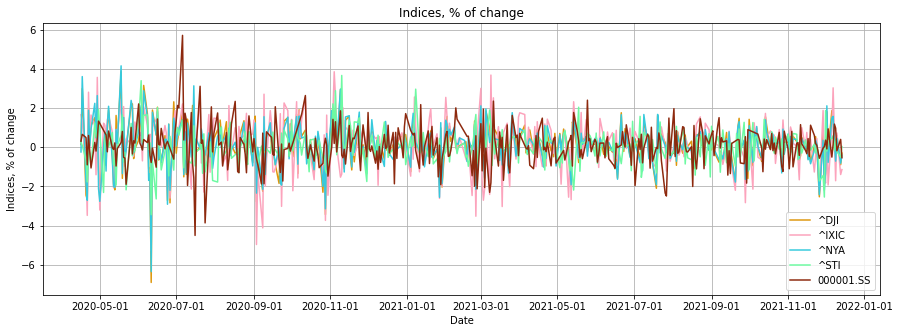

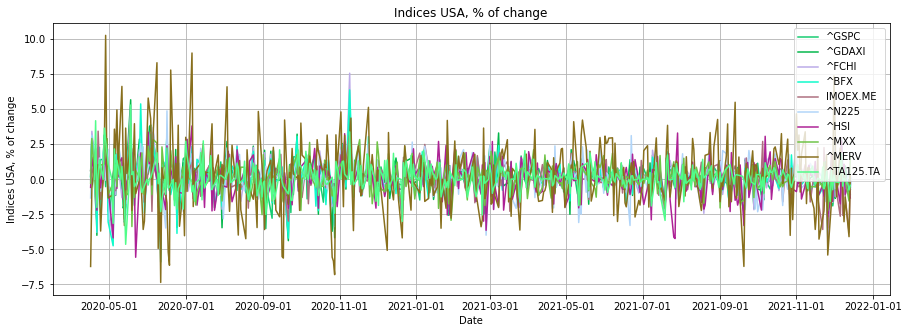

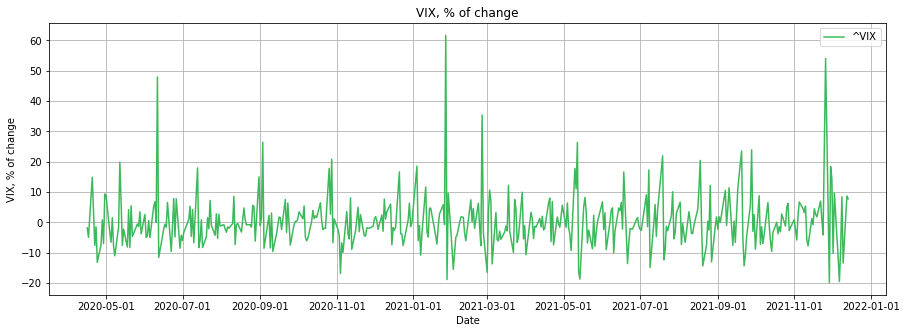

In [22]:
variable = "Indices, % of change"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()
for country in lst_countries:
   for ind in dic_df_s_indices_byCountry[country][1:]:
     if(ind["ticker"][0] != "^VIX"):
        ax.plot(ind.index.values,ind["s_perc_diff"], c=(random.random(),random.random(), random.random()), label = ind["ticker"][0])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()

variable = "Indices USA, % of change"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()
for country in lst_countries:
   for ind in dic_df_s_indices_byCountry[country][0:1]:
     if(ind["ticker"][0] != "^VIX"):
        ax.plot(ind.index.values,ind["s_perc_diff"], c=(random.random(),random.random(), random.random()), label = ind["ticker"][0])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()

variable = "VIX, % of change"
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()
for country in lst_countries:
   for ind in dic_df_s_indices_byCountry[country][1:]:
     if(ind["ticker"][0] == "^VIX"):
        ax.plot(ind.index.values,ind["s_perc_diff"], c=(random.random(),random.random(), random.random()), label = ind["ticker"][0])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()

plt.show()

We have 3 "Waves" (July - August 2020, November 2020 - January 2021, July - September 2021). Those are the major changes that the pandemic had, with the greatest impact on our lives, specifically on the stock market.

Also good to look on VIX, which looks on the amount of "fear" in the market

# Model training and assesment

We'll now try and take our combined dataset and train a linear/logistic regression model

In [23]:
from sklearn import linear_model
from sklearn import metrics

def trainLinearStocksWithCovid(lst_df_stocks, df_cases, cases_col_name, stocks_col_name):
  good_linear_models = {}
  count = 0
  for df in lst_df_stocks:
    if(df.empty == False):
      #combined dataset without weekends that have no stock trade
      df_combined_train = pd.concat([df_cases[cases_col_name].loc["2020-11-01":"2020-12-31"], 
                                df[stocks_col_name].loc["2020-11-01":"2020-12-31"]], axis = 1)
      df_combined_train_filtered_weekend = df_combined_train.dropna()
      if(df_combined_train_filtered_weekend.empty == False and (df[stocks_col_name].loc["2020-09-01":"2020-12-31"].dtype == "int64" or df[stocks_col_name].loc["2020-09-01":"2020-12-31"].dtype == "float64")):
        #Linear regression
        try:
          lim = linear_model.LinearRegression().fit(df_combined_train_filtered_weekend.iloc[:, 0:1],
                                                  df_combined_train_filtered_weekend.iloc[:, 1:2])
        except:
          print("PROOOBBB", df[stocks_col_name].loc["2020-12-31":"2020-09-01"])
          continue
        df_combined_test = pd.concat([df_cases[cases_col_name].loc["2021-07-01":"2021-09-15"], 
                                df[stocks_col_name].loc["2021-07-01":"2021-09-15"]], axis = 1)
        df_combined_test_filtered_weekends = df_combined_test.dropna()
        #Below 0.5 would be not good :)
        # The coefficient of determination: 1 is perfect prediction
        if metrics.r2_score(df_combined_test_filtered_weekends[stocks_col_name],
                            lim.predict(df_combined_test_filtered_weekends.iloc[:,0:1])) < 1:
          #print("Coefficient of determination (r squared): %.2f" % metrics.r2_score(df_combined_test_filtered_weekends[stocks_col_name],
                                                                                    #lim.predict(df_combined_test_filtered_weekends.iloc[:,0:1])))
          #print (df["ticker"][0], " ", count)
          #print("Coefficients: \n", lim.coef_)
          good_linear_models[df["ticker"][0]] = lim
    count += 1
  return good_linear_models

'''for country in lst_countries:
  trainLinearStocksWithCovid(dic_df_s_indices_byCountry[country], dic_c_df_cases_byCountry[country], "c_perc_diff", "s_perc_diff")'''

price_models = trainLinearStocksWithCovid(copy_lst_df_s_sp500stocks, dic_c_df_cases_byCountry["USA"], "cases_rolling", "adjclose")
perc_model = trainLinearStocksWithCovid(copy_lst_df_s_sp500stocks, dic_c_df_cases_byCountry["USA"], "c_perc_diff", "s_perc_diff")


{'A': LinearRegression(), 'AAL': LinearRegression(), 'AAP': LinearRegression(), 'AAPL': LinearRegression(), 'ABBV': LinearRegression(), 'ABC': LinearRegression(), 'ABMD': LinearRegression(), 'ABT': LinearRegression(), 'ACN': LinearRegression(), 'ADBE': LinearRegression(), 'ADI': LinearRegression(), 'ADM': LinearRegression(), 'ADP': LinearRegression(), 'ADSK': LinearRegression(), 'AEE': LinearRegression(), 'AEP': LinearRegression(), 'AES': LinearRegression(), 'AFL': LinearRegression(), 'AIG': LinearRegression(), 'AIZ': LinearRegression(), 'AJG': LinearRegression(), 'AKAM': LinearRegression(), 'ALB': LinearRegression(), 'ALGN': LinearRegression(), 'ALK': LinearRegression(), 'ALL': LinearRegression(), 'ALLE': LinearRegression(), 'AMAT': LinearRegression(), 'AMCR': LinearRegression(), 'AMD': LinearRegression(), 'AME': LinearRegression(), 'AMGN': LinearRegression(), 'AMP': LinearRegression(), 'AMT': LinearRegression(), 'AMZN': LinearRegression(), 'ANET': LinearRegression(), 'ANSS': LinearRe

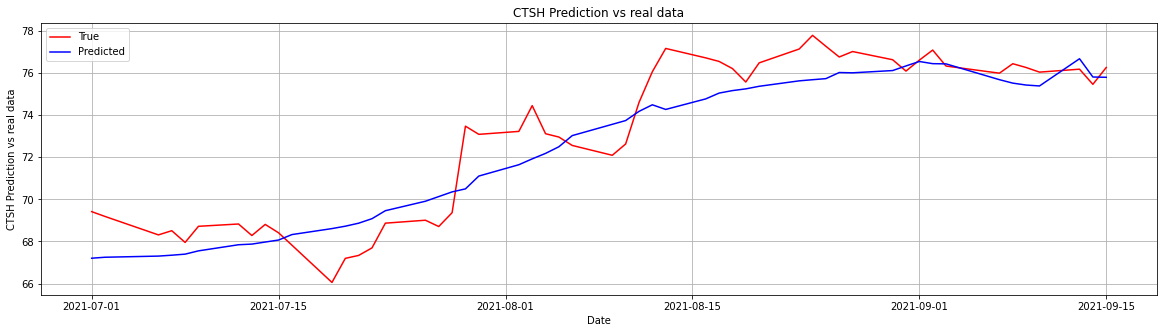

In [25]:


df_combined_test = pd.concat([dic_c_df_cases_byCountry["USA"].loc["2021-07-01":"2021-09-15"]["cases_rolling"], 
                           copy_lst_df_s_sp500stocks[120]["adjclose"].loc["2021-07-01":"2021-09-15"]], axis = 1)
df_combined_test_filtered_weekends = df_combined_test.dropna()
variable = "CTSH Prediction vs real data"
fig, ax = plt.subplots(figsize=(20,5))
ax.grid()
ax.plot(df_combined_test_filtered_weekends.index.values,df_combined_test_filtered_weekends["adjclose"], c='r', label = "True")
ax.plot(df_combined_test_filtered_weekends.index.values,price_models["CTSH"].predict(df_combined_test_filtered_weekends.iloc[:, 0:1]), c='b', label = "Predicted")
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()


plt.show()

In [37]:
#Logistic regression
from sklearn import linear_model
from sklearn import metrics

def trainLogisticStocksWithCovid(lst_df_stocks, df_cases, cases_col_name, stocks_col_name):
  good_logistic_models = []
  count = 0
  for df in lst_df_stocks:
    if(df.empty == False):
      #combined dataset without weekends that have no stock trade
      df_combined_train = pd.concat([df_cases[cases_col_name].loc["2020-11-01":"2020-12-31"], 
                                df[stocks_col_name].loc["2020-11-01":"2020-12-31"]], axis = 1)
      df_combined_train_filtered_weekend = df_combined_train.dropna()
      if(df_combined_train_filtered_weekend.empty == False):
        #Logistic regression
        try:
          lom = linear_model.LogisticRegression().fit(df_combined_train_filtered_weekend.iloc[:, 0:1],
                                                  df_combined_train_filtered_weekend.iloc[:, 1:2].values.ravel())
        except:
          print("PROOOBBB", df[stocks_col_name].loc["2020-12-31":"2020-09-01"])
          continue
        df_combined_test = pd.concat([df_cases[cases_col_name].loc["2021-07-01":"2021-09-15"], 
                                df[stocks_col_name].loc["2021-07-01":"2021-09-15"]], axis = 1)
        df_combined_test_filtered_weekends = df_combined_test.dropna()
        #Below 0.5 would be not good :)
        # The coefficient of determination: 1 is perfect prediction
        if metrics.precision_score(df_combined_test_filtered_weekends[stocks_col_name],
                            lom.predict(df_combined_test_filtered_weekends.iloc[:,0:1])) > 0.55:
          print("precision score: %.2f" % metrics.precision_score(df_combined_test_filtered_weekends[stocks_col_name],
                                                                                    lom.predict(df_combined_test_filtered_weekends.iloc[:,0:1])))
          print (df["ticker"][0], " ", count)
          print("Coefficients: \n", lom.coef_)
          good_logistic_models.append(lom)
      count += 1     
  return good_logistic_models
dic_good_logistic_models_byCountry = {}
for country in lst_countries:
  dic_good_logistic_models_byCountry[country] = trainLogisticStocksWithCovid(dic_df_s_indices_byCountry[country], dic_c_df_cases_byCountry[country], "cases_rolling", "s_is_up")

precision score: 0.58
^GSPC   0
Coefficients: 
 [[1.06033292e-06]]
precision score: 0.60
^IXIC   2
Coefficients: 
 [[3.65360353e-06]]
precision score: 0.56
^GDAXI   0
Coefficients: 
 [[1.84032385e-05]]
precision score: 0.60
^BFX   0
Coefficients: 
 [[0.00012089]]
precision score: 0.65
IMOEX.ME   0
Coefficients: 
 [[2.96404862e-05]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision score: 0.58
^MXX   0
Coefficients: 
 [[2.62522157e-05]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


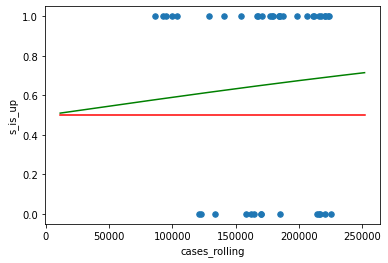

In [36]:
import numpy as np
from scipy.special import expit

df_combined_train = pd.concat([dic_c_df_cases_byCountry["USA"]["cases_rolling"].loc["2020-11-01":"2020-12-31"], 
                          dic_df_s_indices_byCountry["USA"][2]["s_is_up"].loc["2020-11-01":"2020-12-31"]], axis = 1)
df_combined_train_filtered_weekend = df_combined_train.dropna()
df_combined_train_filtered_weekend.plot.scatter(x='cases_rolling',y='s_is_up',s=30)
  #create a set of points along the x axis to print prediction graph
x = np.linspace(dic_c_df_cases_byCountry["USA"]["cases_rolling"].min(),dic_c_df_cases_byCountry["USA"]["cases_rolling"].max(),1000)

#get probabilistic predictions for those points (using predict_proba)
y_pred_p = dic_good_logistic_models_byCountry["USA"][1].predict_proba(np.reshape(x, (-1, 1))) # we need to reshape x to get it to a 2 dimensional array

#get only the probability for the "pass" category
y_pred_p1=[y[1] for y in y_pred_p]

#plot the prediction graph
#plt.plot(x,y_pred_p1,color='Black')

# this is an alternative plot option to calculate directly the predicted value, using the model paramters and avoiding predict_proba function
# you can uncomment the line below, and comment the line before and see the results
plt.plot(x,expit(dic_good_logistic_models_byCountry["USA"][1].intercept_[0]+dic_good_logistic_models_byCountry["USA"][1].coef_[0][0]*x),color='green')

# draw the line of y=0.5 as the decision point
plt.plot(x,[0.5]*len(x),color="red")
plt.show()

     price_diff ticker
207         440  GOOGL
206         377   GOOG
102         342    CMG
314         199   MRNA
322         180    MTD
64          165   BKNG
62          133    BIO
151         125   DXCM
312         125   MPWR
317         114   MSCI
147
   price_diff ticker
0         -37   MKTX
1         102   PAYC
2          -9    CLX
3          28   VRSK
4         -14   VRTX
5          11    BLL
6           6     ES
7           3    WEC
8           7   CTSH
9           5    WMT
The best stocks would give you  12200
If you would listen to the model you'd have  10102


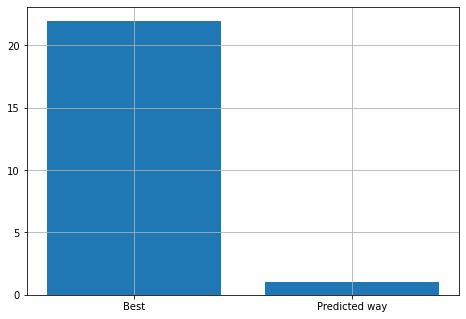

In [122]:
import matplotlib.pyplot as plt
df = pd.DataFrame(columns = ["price_diff", "ticker"])
dict_rows = {}
dict_rows["price_diff"] = []
dict_rows["ticker"] = []
for stock in df_s_sp500stocks:
  dict_rows["price_diff"].append(stock["adjclose"].loc["2021-09-15"] - stock["adjclose"].loc["2021-07-01"])
  dict_rows["ticker"].append(stock["ticker"][0])
df = df.from_dict(dict_rows)
df_large = df.nlargest(10 , columns = ["price_diff"])
print(df_large)

dic_s_predAdjclose = {}

for stock in price_models.keys():
  for sbstock in df_s_sp500stocks:
    if (sbstock["ticker"][0] == stock):
      df_combined_test = pd.concat([dic_c_df_cases_byCountry["USA"]["cases_rolling"].loc["2021-07-01":"2021-09-15"], 
                                    sbstock["adjclose"].loc["2021-07-01":"2021-09-15"]], axis = 1)
      df_combined_test_filtered_weekends = df_combined_test.dropna()

      dic_s_predAdjclose[stock] = pd.DataFrame(price_models[stock].predict(df_combined_test_filtered_weekends.iloc[:, 0:1]), columns = ["pred"])["pred"]
print(df_s_sp500stocks[0]["adjclose"].loc["2021-07-01"])
dict_rows = {}
dict_rows["price_diff"] = []
dict_rows["ticker"] = []
df = pd.DataFrame(columns = ["price_diff", "ticker"])
for stock in price_models.keys():
  for ftock in df_s_sp500stocks:
    if(ftock["ticker"][0] == stock):
      dict_rows["price_diff"].append(dic_s_predAdjclose[stock].iloc[-1:].iloc[0] - ftock["adjclose"].loc["2021-07-01"])
      dict_rows["ticker"].append(stock)
df2 = df.from_dict(dict_rows)
df2_large = df2.nlargest(10, columns = ["price_diff"])

df = pd.DataFrame(columns = ["price_diff", "ticker"])
dict_rows = {}
dict_rows["price_diff"] = []
dict_rows["ticker"] = []
for stock in df2_large["ticker"]:
  for sbstock in df_s_sp500stocks:
    if (sbstock["ticker"][0] == stock):
      dict_rows["price_diff"].append(sbstock["adjclose"].loc["2021-09-15"] - sbstock["adjclose"].loc["2021-07-01"])
      dict_rows["ticker"].append(stock)
df3 = df.from_dict(dict_rows)

best_pct_gained = (((10000 + df_large["price_diff"].sum()) / 10000) - 1) * 100
pred_pct_gained = (((10000 + df3["price_diff"].sum()) / 10000) - 1) * 100
print (df3)


print ("The best stocks would give you ", 10000 + df_large["price_diff"].sum())
print ("If you would listen to the model you'd have ", 10000 + df3["price_diff"].sum())
variable = "How much % we gained vs. the best possible"
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.bar(["Best", "Predicted way"], [best_pct_gained, pred_pct_gained])
plt.show()



